In [1]:
from hack_itau_quant import EfficientFrontier
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pandas as pd

In [67]:
tickers = ['BPAC11.SA', 'ITUB4.SA', 'OIBR3.SA', 'PETR4.SA']

close_prices = yf.download(tickers, start='2017-01-01', end='2021-01-01')['Close']

returns = close_prices.pct_change()[1:]

expected_returns = returns.mean()
cov_matrix = returns.cov()

[*********************100%***********************]  4 of 4 completed


In [68]:
ef = EfficientFrontier(expected_returns, cov_matrix)

In [149]:
returns, risks = [], []
weights = []

for r in tqdm(np.arange(0.0009, 0.003, 0.00005)):

    w = ef.efficient_return(r).reshape(4, 1)
    
    w = w / np.sum(w)
    
    if np.sum(w) != 1:
        print(w, np.sum(w))
    
    weight_dict = {tickers[i]: float(w[i]) for i in range(len(tickers))}
    weights.append(weight_dict)

    rs = np.dot(w.T, expected_returns)

    sigma = np.sqrt(np.dot(w.T, np.dot(cov_matrix, w)))

    returns.append(float(rs) * 252)
    risks.append(float(sigma) * np.sqrt(252))

100%|██████████| 43/43 [00:00<00:00, 1774.73it/s]

[[0.17665065]
 [0.66517978]
 [0.11584856]
 [0.04232101]] 1.0000000000000002
[[0.23258636]
 [0.5996078 ]
 [0.11726311]
 [0.05054273]] 1.0000000000000002
[[0.37242562]
 [0.43567784]
 [0.1207995 ]
 [0.07109704]] 1.0000000000000002
[[0.42836133]
 [0.37010585]
 [0.12221405]
 [0.07931876]] 1.0000000000000002
[[0.62413631]
 [0.14060391]
 [0.12716499]
 [0.10809479]] 1.0000000000000002
[[ 0.90381484]
 [-0.18725602]
 [ 0.13423777]
 [ 0.14920341]] 0.9999999999999998
[[ 0.95975055]
 [-0.252828  ]
 [ 0.13565232]
 [ 0.15742513]] 0.9999999999999999
[[ 0.9877184 ]
 [-0.28561399]
 [ 0.1363596 ]
 [ 0.16153599]] 1.0000000000000002
[[ 1.26739694]
 [-0.61347392]
 [ 0.14343237]
 [ 0.2026446 ]] 1.0000000000000002


In [157]:
df = pd.DataFrame(weights)

df = (df * 100).round(2).astype(str) + '%'

df['Returns'] = returns
df['Volatilies'] = risks
df['Sharpe'] = (df['Returns']) / (df['Volatilies'])

In [158]:
df.head()

,BPAC11.SA,ITUB4.SA,OIBR3.SA,PETR4.SA,Returns,Volatilies,Sharpe
0,14.87%,69.8%,11.51%,3.82%,0.2268,0.323636,0.700788
1,17.67%,66.52%,11.58%,4.23%,0.2394,0.325452,0.735592
2,20.46%,63.24%,11.66%,4.64%,0.2520,0.327777,0.768816
3,23.26%,59.96%,11.73%,5.05%,0.2646,0.330599,0.800365
4,26.06%,56.68%,11.8%,5.47%,0.2772,0.333906,0.830173


In [159]:
import plotly.express as px

hover_data = ['Sharpe', *tickers]

max_sharpe = df[df.Sharpe == df.Sharpe.max()]
min_vol = df[df.Volatilies == df.Volatilies.min()]

fig = px.line(df, x="Volatilies", y="Returns", hover_data=hover_data, title="Efficient Frontier")
fig.data[0].update(mode='markers+lines')

fig.add_scatter(x=max_sharpe.Volatilies, y=max_sharpe.Returns)
fig.add_scatter(x=min_vol.Volatilies, y=min_vol.Returns)

fig.show()

In [110]:
min_vol

,BPAC11.SA,ITUB4.SA,OIBR3.SA,PETR4.SA,Returns,Volatilies,Sharpe
0,14.87,69.8,11.51,3.82,0.2268,0.323636,0.700788


In [108]:
import plotly.graph_objects as go


fig = go.Figure()

fig.add_trace(go.Scatter(x=df.Volatilies, y=df.Returns,
                    mode='lines+markers',
                    name='Efficient Frontier',
                    customdata=np.dstack((z2, z3)),
    hovertemplate='<b>z1:%{z:.3f}</b><br>z2:%{customdata[0]:.3f} <br>z3: %{customdata[1]:.3f} '))

# fig.add_trace(go.Scatter(x=df.Volatilies, y=df.Returns,
#                     mode='markers',
#                     name='Portfolio'))

max_sharpe = df[df.Sharpe == df.Sharpe.max()]

fig.add_trace(go.Scatter(x=max_sharpe.Volatilies, y=max_sharpe.Returns,
                    mode='markers',
                    name='Best Sharpe'))

fig.show()

NameError: name 'z2' is not defined

In [43]:
df[df.Sharpe == df.Sharpe.max()]

,BPAC11.SA,ITUB4.SA,OIBR3.SA,PETR4.SA,Returns,Volatilies,Sharpe
26,0.875847,-0.15447,0.13353,0.145093,0.0022,0.031229,1.118333


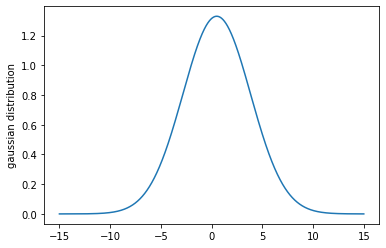

In [192]:
rp = 0.5
sigma_p = 0.3
variance = np.square(sigma_p)
max_loss = 0.8
n_days = 1

x = np.arange(-15,15, 0.01)
f = np.exp(-np.square(x-rp)/2*variance)/(np.sqrt(2*np.pi*variance))

plt.plot(x,f)
plt.ylabel('gaussian distribution')
plt.show()

Alternativa 0.0009000000000000001 0.020387143479350004
-2.0061662901145185


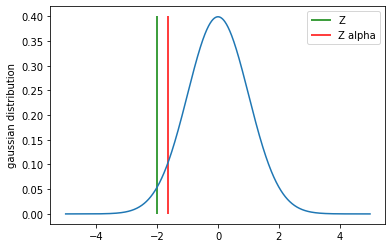

Alternativa 0.0009500000000000002 0.020501561291913335
-1.9974088517908328


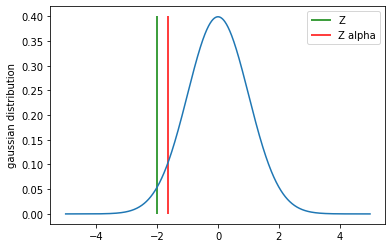

Alternativa 0.0010000000000000002 0.02064800101396182
-1.985664373625152


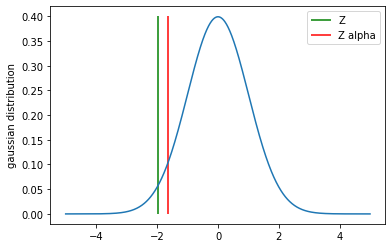

Alternativa 0.0010500000000000004 0.020825787155521188
-1.9711139700722962


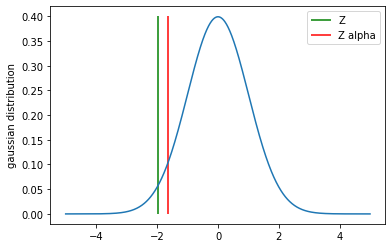

Alternativa 0.0011 0.0210341248862316
-1.9539676702643811


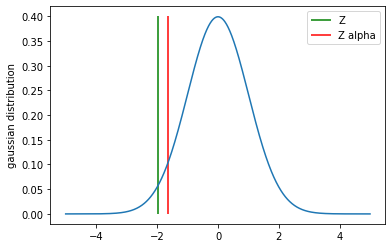

Alternativa 0.0011500000000000002 0.021272116564181324
-1.9344572448089015


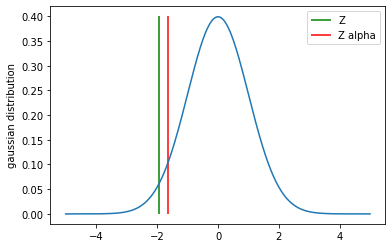

Alternativa 0.0012000000000000003 0.02153877923232096
-1.9128289284926387


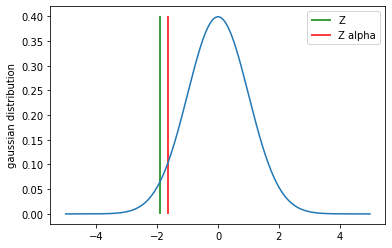

Alternativa 0.0012500000000000005 0.02183306237853997
-1.889336424034826


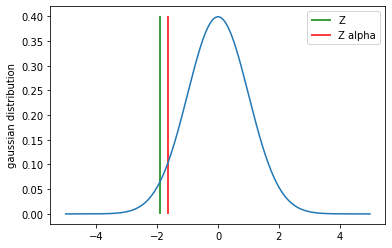

Alternativa 0.0013000000000000006 0.02215386533180582
-1.864234497295896


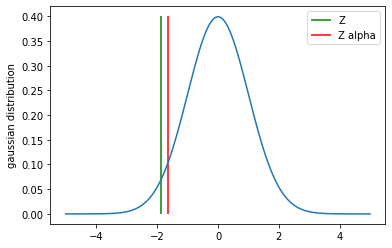

Alternativa 0.0013500000000000003 0.02250005377243289
-1.8377733857090643


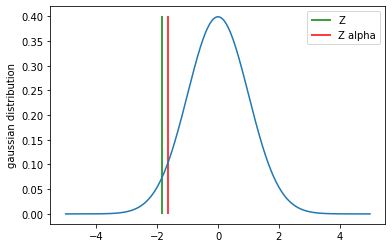

Alternativa 0.0014000000000000002 0.022870474955561566
-1.8101941512120843


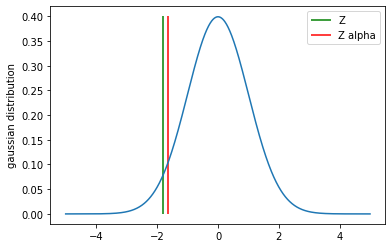

Alternativa 0.0014500000000000008 0.023263971370588894
-1.7817250262095192


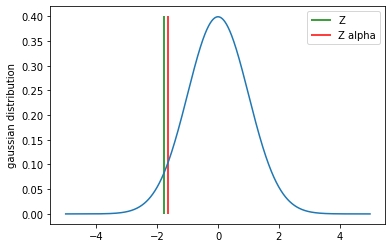

Alternativa 0.0015000000000000005 0.023679392675451032
-1.7525787324361575


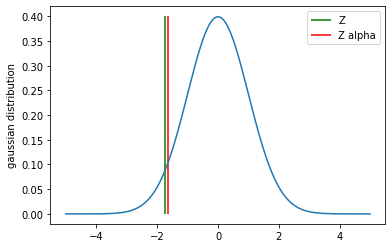

Alternativa 0.0015500000000000004 0.02411560584627394
-1.7229507010880185


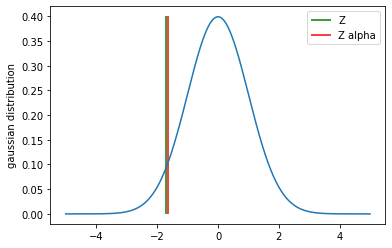

Alternativa 0.0016000000000000007 0.024571503566031393
-1.6930180885434079


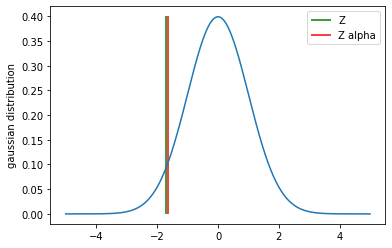

Alternativa 0.0016500000000000009 0.025046010939192665
-1.6629394637381145


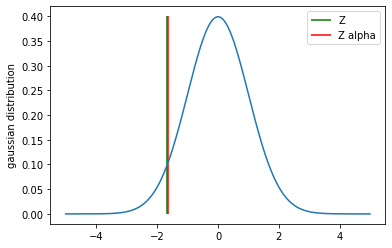

Nula
Nula
Nula
Nula
Nula
Nula
Nula
Nula
Nula
Nula
Nula
Nula
Nula
Nula
Nula
Nula
Nula
Nula
Nula
Nula
Nula
Nula
Nula
Nula
Nula
Nula
Nula


In [252]:
z_alpha = -1.645
time = 1
max_loss = -0.04

for r in np.arange(0.0009, 0.003, 0.00005):

    w = ef.efficient_return(r).reshape(-1)
    
    rp = np.dot(w.T, expected_returns) * time

    sigma_p = np.sqrt(np.dot(w.T, np.dot(cov_matrix * np.sqrt(time), w)))
    
    z =  (max_loss - rp) / (sigma_p / np.sqrt(time))
    
    if z <= z_alpha:
        print("Alternativa", float(rp), float(sigma_p))
        print(z)
        
        sigma_p_2 = np.square(sigma_p)
        
        x = np.arange(-5,5, 0.01)
        f = np.exp(-np.square(x-0)/2* 1 ** 2)/(np.sqrt(2*np.pi* 1 ** 2))

        plt.plot(x,f)
        plt.ylabel('gaussian distribution')
        
        h = 0.4
        
        plt.vlines(z, 0, h, label='Z', color='green')
        plt.vlines(z_alpha, 0, h, label='Z alpha', color = 'red')
        
        plt.legend()
        
        plt.show()
        
    else:
        print("Nula")